<a href="https://colab.research.google.com/github/preetikhullbe/Book-Recommendation-sysytem/blob/main/Book_recommendation_system_preeti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**  **-Book Recommendation System**

##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual

## **Understanding Book recommendation**
#### A book recommendation system is a type of recommendation system where we have to recommend similar books to the reader based on his interest. The books recommendation system is used by online websites which provide ebooks like google play books, open library, good Read’s, etc

####A recommendation system is usually built using 3 techniques which are content-based filtering, collaborative filtering, and a combination of both.In this project, we will use the Collaborative based filtering method to build a book recommender system.
####**Collaborative filtering** is a technique commonly used to build personalized recommendations in online products. Among companies using the collaborative filtering technology we can find some popular websites like: Amazon, Netflix, IMDB. In collaborative filtering, algorithms are used to make automatic predictions about a user's interests by compiling preferences from several users.

# **GitHub Link -**
https://github.com/preetikhullbe/Book-Recommendation-sysytem

# **Let's Begin !**

# **Datset desription**
### The Book_crossing dataset comprises 3 files.

### **Users:**Users : Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.


### **Books:**Books : Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website.

### **Ratings :**Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.






# **Load libraries**

In [3]:
import numpy as np 
import pandas as pd 
import math
import seaborn as sns
import matplotlib.pyplot as plt 
from collections import Counter
from scipy.sparse import csr_matrix
from pandas.api.types import is_numeric_dtype
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
#System
import warnings
import os
warnings.filterwarnings("ignore")
%matplotlib inline

In [5]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#loading Books Data
books = pd.read_csv('/content/drive/MyDrive/Books.csv')
#loading Users Data
users = pd.read_csv('/content/drive/MyDrive/Users.csv')
#loading Ratings Data
ratings = pd.read_csv('/content/drive/MyDrive/Ratings.csv')

In [7]:
#first five records of books dataset
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [8]:
#first five records of Users dataset
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [9]:
#first five records of Ratings dataset
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [10]:
#exploring shape of the all three datasets
print("Books Data:    ", books.shape)
print("Users Data:    ", users.shape)
print("Books-ratings: ", ratings.shape)

Books Data:     (271360, 8)
Users Data:     (278858, 3)
Books-ratings:  (1149780, 3)


In [11]:
#present columns(features) in the book dataset
print("columns in books data:",list(books.columns))
#present columns(features) in the users dataset
print("columns in users data:",list(users.columns))
#present columns(features) in the ratings dataset
print("columns in ratings data:",list(ratings.columns))

columns in books data: ['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L']
columns in users data: ['User-ID', 'Location', 'Age']
columns in ratings data: ['User-ID', 'ISBN', 'Book-Rating']


## **Pre-processing**

### **Books Dataset Pre-processing**

In [12]:
print("Columns: ", list(books.columns))
books.head()

Columns:  ['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L']


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


### So these columns named as Image-URL-S,Image-URL-M and mage-URL-L are not relevant and important for our analysis.so it's better to drop these out.

In [13]:
## Drop URL columns
books.drop(['Image-URL-S','Image-URL-M','Image-URL-L'], axis=1, inplace=True)
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [14]:
#Renaiming columns for our convenience
books.rename(columns={'Book-Title':'BookTitle', 'Book-Author':'BookAuthor','Year-Of-Publication':'YearOfPublication'},inplace=True)

In [15]:
#Checking for null values
books.isnull().sum()

ISBN                 0
BookTitle            0
BookAuthor           1
YearOfPublication    0
Publisher            2
dtype: int64

In [16]:
#looking for the one nan value in "BookAuthor"
books.loc[books['BookAuthor'].isnull(),:]

,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


In [17]:
#looking for the one nan value in "Publisher"
books.loc[books['Publisher'].isnull(),:]

,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [18]:
#Replacing nan values with "other"
books.at[187689 ,'BookAuthor'] = 'Other'
books.at[128890 ,'Publisher'] = 'Other'
books.at[129037 ,'Publisher'] = 'Other'

In [19]:
#Checking for null values after treating nan
books.isnull().sum()

ISBN                 0
BookTitle            0
BookAuthor           0
YearOfPublication    0
Publisher            0
dtype: int64

In [20]:
## Checking for column Yearofpublication
books['YearOfPublication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

### In "YearOfPublication" column we have some invalid data ,so need to explore those.

In [21]:
#those column where value of year is 'DK Publishing Inc'
books.loc[books['YearOfPublication'] == 'DK Publishing Inc',:]

,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [22]:
#those column where value of year is 'DK Publishing Inc'
books.loc[books['YearOfPublication'] == 'Gallimard',:]

,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


### so we can see from the above two observations that there is some mismatch of data,so we have to place these values on correct positions.

In [23]:
#placing values onto correct columns
books.at[209538 ,'Publisher'] = 'DK Publishing Inc'
books.at[209538 ,'YearOfPublication'] = 2000
books.at[209538 ,'BookTitle'] = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'
books.at[209538 ,'BookAuthor'] = 'Michael Teitelbaum'

books.at[221678 ,'Publisher'] = 'DK Publishing Inc'
books.at[221678 ,'YearOfPublication'] = 2000
books.at[209538 ,'BookTitle'] = 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'
books.at[209538 ,'BookAuthor'] = 'James Buckley'

books.at[220731 ,'Publisher'] = 'Gallimard'
books.at[220731 ,'YearOfPublication'] = '2003'
books.at[209538 ,'BookTitle'] = 'Peuple du ciel - Suivi de Les bergers '
books.at[209538 ,'BookAuthor'] = 'Jean-Marie Gustave Le ClÃ?Â©zio'

In [24]:
# Converting year of publication in Numbers
books['YearOfPublication'] = books['YearOfPublication'].astype(int)

In [25]:
#all unique values present in 'YearOfPublication'
print(sorted(list(books['YearOfPublication'].unique())))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


###  We can clearly see that their are some noise values in the Year of Publication features :-
### 1. String Noise Values - such as 'DK Publishing Inc' and 'Gallimard.
### 2. Integer Noise Values - Since this data was collected in august 2004, so any year value greater than 2004 is a noise value.

In [26]:
# Replacing Invalid years with max year
books.loc[books['YearOfPublication'] > 2021, 'YearOfPublication'] = 2002
books.loc[books['YearOfPublication'] < 1400, 'YearOfPublication'] = 2002
books.loc[books['YearOfPublication'] == 0, 'YearOfPublication'] = 2002

In [27]:
# Uppercasing all alphabets in ISBN
books['ISBN'] = books['ISBN'].str.upper()

In [28]:
#all unique values present in 'ISBN'
books['ISBN'].unique()

array(['0195153448', '0002005018', '0060973129', ..., '006008667X',
       '0192126040', '0767409752'], dtype=object)

In [29]:
#Drop duplicate rows
books.drop_duplicates(keep='last', inplace=True) 
books.reset_index(drop = True, inplace = True)

In [30]:
#Basic info
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271047 entries, 0 to 271046
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ISBN               271047 non-null  object
 1   BookTitle          271047 non-null  object
 2   BookAuthor         271047 non-null  object
 3   YearOfPublication  271047 non-null  int64 
 4   Publisher          271047 non-null  object
dtypes: int64(1), object(4)
memory usage: 10.3+ MB


## **Users Dataset Pre-processing**

In [31]:
#list of columns in "users" dataset
list(users.columns)

['User-ID', 'Location', 'Age']

In [32]:
#Renaiming "User-ID"
users.rename(columns={'User-ID':'UserID'},inplace=True)

In [33]:
# Checking null values
print(users.isna().sum()) 

UserID           0
Location         0
Age         110762
dtype: int64


### In column 'Age' we have 110762 missing values,have to fill these.

In [34]:
#Check for all values present in Age column
print(sorted(list(users['Age'].unique())))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

in this column we have many invalid values.

In [35]:
#claculating average age of the people between 80 and 10 years
required = users[users['Age'] <= 80]
required = required[required['Age'] >= 10]
mean = round(required['Age'].mean())   
mean

35

In [36]:
#outliers with age grater than 80 are substituted with mean 
users.loc[users['Age'] > 80, 'Age'] = mean
#outliers with age less than 10 years are substitued with mean
users.loc[users['Age'] < 10, 'Age'] = mean   
#filling null values with mean
users['Age'] = users['Age'].fillna(mean)  
#changing Datatype to int
users['Age'] = users['Age'].astype(int)       

In [37]:
# Checking null values
print(users.isna().sum()) 

UserID      0
Location    0
Age         0
dtype: int64


In [38]:
#exploring first 10 records of 'Location' column
users.Location.head(10)

0                    nyc, new york, usa
1             stockton, california, usa
2       moscow, yukon territory, russia
3             porto, v.n.gaia, portugal
4    farnborough, hants, united kingdom
5         santa monica, california, usa
6                   washington, dc, usa
7              timmins, ontario, canada
8            germantown, tennessee, usa
9            albacete, wisconsin, spain
Name: Location, dtype: object

In [39]:
#exploring last 10 records of 'Location' column
users.Location.tail(10)

278848           georgetown, ontario, canada
278849            sergnano, lombardia, italy
278850                    dallas, texas, usa
278851       brisbane, queensland, australia
278852        stranraer, n/a, united kingdom
278853                 portland, oregon, usa
278854    tacoma, washington, united kingdom
278855             brampton, ontario, canada
278856             knoxville, tennessee, usa
278857                  dublin, n/a, ireland
Name: Location, dtype: object

### In Location column we have city,state and country names ,separated by comma.
### So for better understanding we will make three columns for all the three values.

In [40]:
#assigning 1st elements to city,2nd element to state and 3rd element to country
list_ = users.Location.str.split(', ')

city = []
state = []
country = []
for i in range(0,len(list_)):
    if list_[i][0] == ' ' or list_[i][0] == '' or list_[i][0]=='n/a' or list_[i][0] == ',':  #removing invalid entries too
        city.append('other')
    else:
        city.append(list_[i][0].lower())
    if(len(list_[i])<2):
         state.append('other')
         country.append('other')
    else:
        if list_[i][1] == ' ' or list_[i][1] == '' or list_[i][1]=='n/a' or list_[i][1] == ',':   #removing invalid entries 
            state.append('other')          
        else:
            state.append(list_[i][1].lower())
        
        if(len(list_[i])<3):
            country.append('other')
        else:
            if list_[i][2] == ''or list_[i][1] == ',' or list_[i][2] == ' ' or list_[i][2] == 'n/a':
                country.append('other')
            else:
                country.append(list_[i][2].lower())
        
#drop 'Location' column from the dataset
users = users.drop('Location',axis=1)

##handling cases where city/state entries from city list as state is already given 
temp = []
for ent in city:
    c = ent.split('/')  
    temp.append(c[0])
#storing values in three different dataframes
df_city = pd.DataFrame(temp,columns=['City'])
df_state = pd.DataFrame(state,columns=['State'])
df_country = pd.DataFrame(country,columns=['Country'])
#adding those three dfs into users dataset
users = pd.concat([users, df_city], axis=1)
users = pd.concat([users, df_state], axis=1)
users = pd.concat([users, df_country], axis=1)

In [41]:
#now users df first look
users.head()

,UserID,Age,City,State,Country
0,1,35,nyc,new york,usa
1,2,18,stockton,california,usa
2,3,35,moscow,yukon territory,russia
3,4,17,porto,v.n.gaia,portugal
4,5,35,farnborough,hants,united kingdom


In [42]:
#checking for null values
users.isnull().sum()

UserID     0
Age        0
City       0
State      0
Country    0
dtype: int64

In [43]:
# Drop duplicate rows
users.drop_duplicates(keep='last', inplace=True)
users.reset_index(drop=True, inplace=True)

In [44]:
#basic info of df
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   UserID   278858 non-null  int64 
 1   Age      278858 non-null  int64 
 2   City     278858 non-null  object
 3   State    278858 non-null  object
 4   Country  278858 non-null  object
dtypes: int64(2), object(3)
memory usage: 10.6+ MB


## **Books Ratings Dataset Preprocessing**

In [45]:
#exploring Ratings dataset
print(list(ratings.columns))
ratings.head()

['User-ID', 'ISBN', 'Book-Rating']


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [46]:
#Renaiming "User-ID" and 'Book-Ratings' columns
ratings.rename(columns={'User-ID':'UserID','Book-Rating':'BookRatings'},inplace=True)

In [47]:
# Checking for null values
ratings.isnull().sum() 

UserID         0
ISBN           0
BookRatings    0
dtype: int64

In [48]:
# checking all ratings number or not
print(is_numeric_dtype(ratings['BookRatings']))

True


IN Ratings column all the values are mumeric.

In [49]:
#checking if there any invalid values are present
ratings.BookRatings.unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2])

In [50]:
## Uppercasing all alphabets in ISBN
ratings['ISBN'] = ratings['ISBN'].str.upper()

In [51]:
#checking for duplicate values
ratings.duplicated().sum()

0

In [52]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   UserID       1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   BookRatings  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


## **Merging of all three Tables**
### **now we have completed all the data pre-processing and our data is ready for further analysis so now we are Merging Books, Users and Rating Tables in One.**

In [53]:
#joining all three dataset using "inner"
book_df = pd.merge(books, ratings, on='ISBN', how='inner')
book_df = pd.merge(book_df, users, on='UserID', how='inner')
book_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031273 entries, 0 to 1031272
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   ISBN               1031273 non-null  object
 1   BookTitle          1031273 non-null  object
 2   BookAuthor         1031273 non-null  object
 3   YearOfPublication  1031273 non-null  int64 
 4   Publisher          1031273 non-null  object
 5   UserID             1031273 non-null  int64 
 6   BookRatings        1031273 non-null  int64 
 7   Age                1031273 non-null  int64 
 8   City               1031273 non-null  object
 9   State              1031273 non-null  object
 10  Country            1031273 non-null  object
dtypes: int64(4), object(7)
memory usage: 94.4+ MB


In [54]:
#checking for null values
book_df.isnull().sum()

ISBN                 0
BookTitle            0
BookAuthor           0
YearOfPublication    0
Publisher            0
UserID               0
BookRatings          0
Age                  0
City                 0
State                0
Country              0
dtype: int64

# **Exploratory Data Analysis**

Text(0.5, 1.0, "Distribution plot of 'Age'")

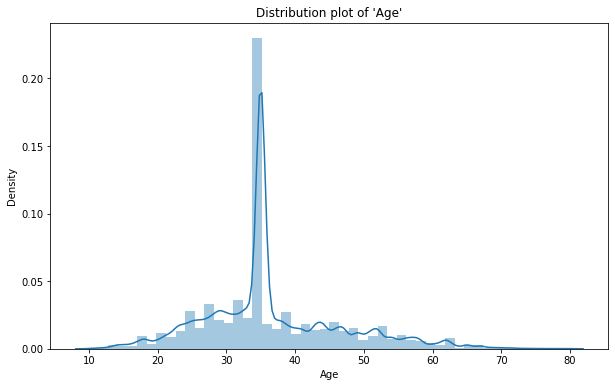

In [55]:
plt.figure(figsize=(10,6))
sns.distplot(book_df['Age'], kde=True)
plt.title("Distribution plot of 'Age'")

# **Ratings Count**

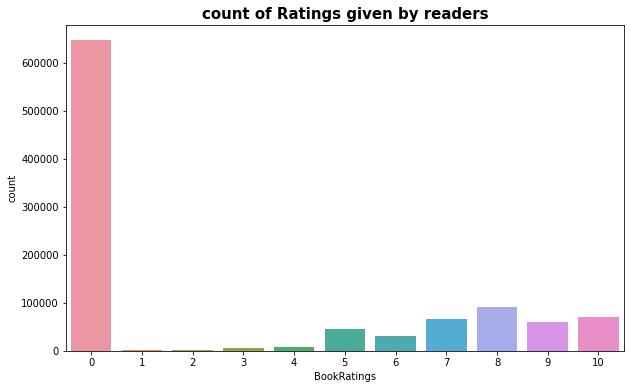

In [56]:
plt.figure(figsize=(10,6))
sns.countplot(x='BookRatings', data=book_df)
plt.title("count of Ratings given by readers",weight='bold').set_fontsize('15')

### **ratings is highly skewed toward the value of zero.**

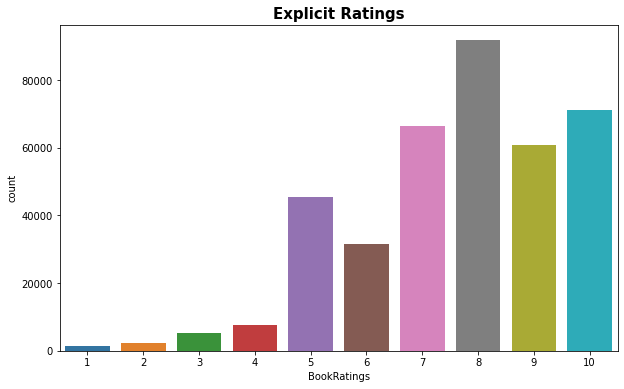

In [57]:
# Explicit Ratings
plt.figure(figsize=(10,6))
data = book_df[book_df['BookRatings'] != 0]
sns.countplot(x="BookRatings", data=data)
plt.title("Explicit Ratings",weight='bold').set_fontsize('15')

### **The skewness perishes after we remove the implicit ratings.most of books got rating of 8.**

# **Book Ratings Count**

In [58]:
#Book ratings count using group by
book_rating=book_df.groupby(['BookTitle'])['BookRatings'].count().sort_values(ascending=False).reset_index()

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 <a list of 7 Text major ticklabel objects>)

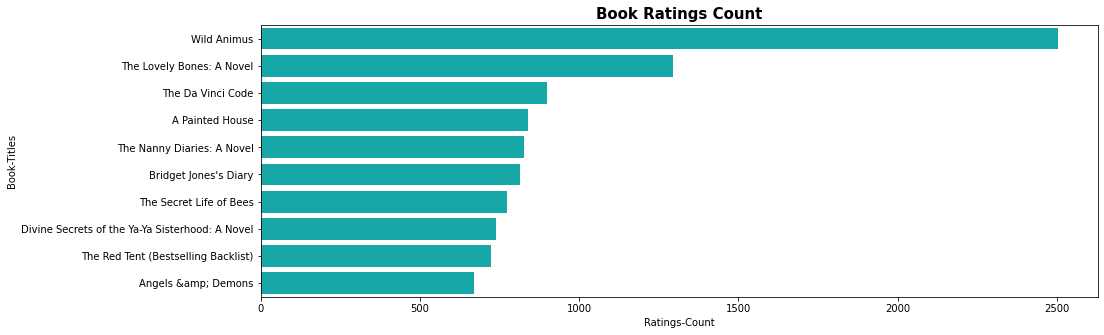

In [59]:
plt.figure(figsize=(15,5))
ax=sns.barplot(book_rating['BookRatings'][:10],book_rating['BookTitle'][:10],color='c')
ax.set_title('Book Ratings Count', fontsize=15,fontweight='bold')
ax.set_xlabel('Ratings-Count')
ax.set_ylabel('Book-Titles')
plt.yticks()
plt.xticks()



### **Here, we are able to observe, most frequently rated books by the users**

### **Most frequently rated book, happens to be Wild Animus.**



# **Most number of books written by authors(Top 10)**

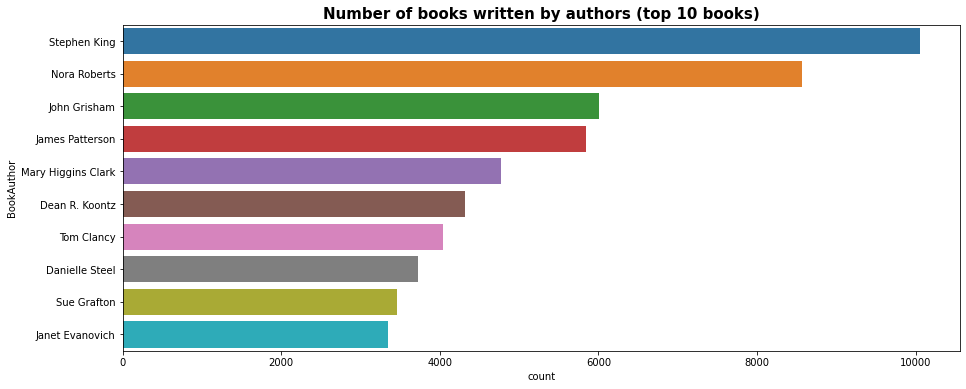

In [60]:
plt.figure(figsize=(15,6))
sns.countplot(y="BookAuthor", data=book_df,order=book_df['BookAuthor'].value_counts().index[0:10])
plt.title("Number of books written by authors (top 10 books)",weight='bold').set_fontsize('15')

# **Most number of books published by publishers(Top 10)**

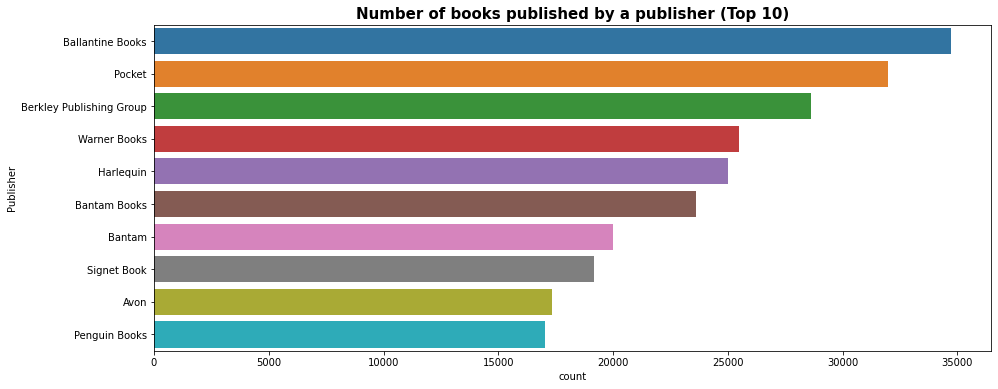

In [61]:
plt.figure(figsize=(15,6))
sns.countplot(y="Publisher", data=book_df,order=book_df['Publisher'].value_counts().index[0:10])
plt.title("Number of books published by a publisher (Top 10)",weight='bold').set_fontsize('15')

# **Author V/S Ratings**

In [62]:
# ratings count per author
author_rating=book_df.groupby(['BookAuthor'])['BookRatings'].count().sort_values(ascending=False).reset_index()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

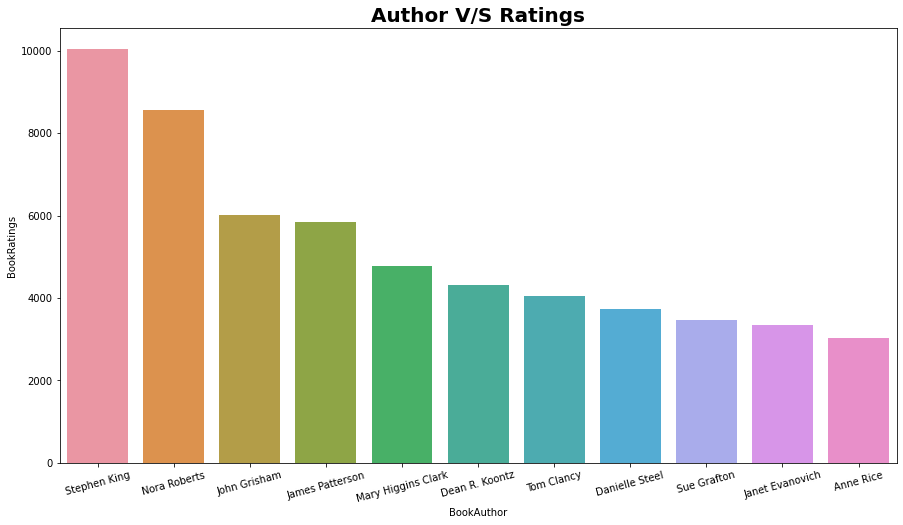

In [63]:
plt.figure(figsize=(15,8))
ax=sns.barplot(author_rating[author_rating['BookRatings']>3000]['BookAuthor'],author_rating[author_rating['BookRatings']>3000]['BookRatings'])
ax.set_title('Author V/S Ratings', fontsize=20,fontweight='bold')
plt.xticks(fontsize=10,rotation=15)

# **Location**

In [64]:
countries=book_df['Country'].value_counts().sort_values(ascending=False)

In [65]:
countries[0:10]

usa               745952
canada             92965
other              35405
united kingdom     32008
germany            27655
australia          18219
spain              14773
france             10632
portugal            6975
new zealand         5558
Name: Country, dtype: int64

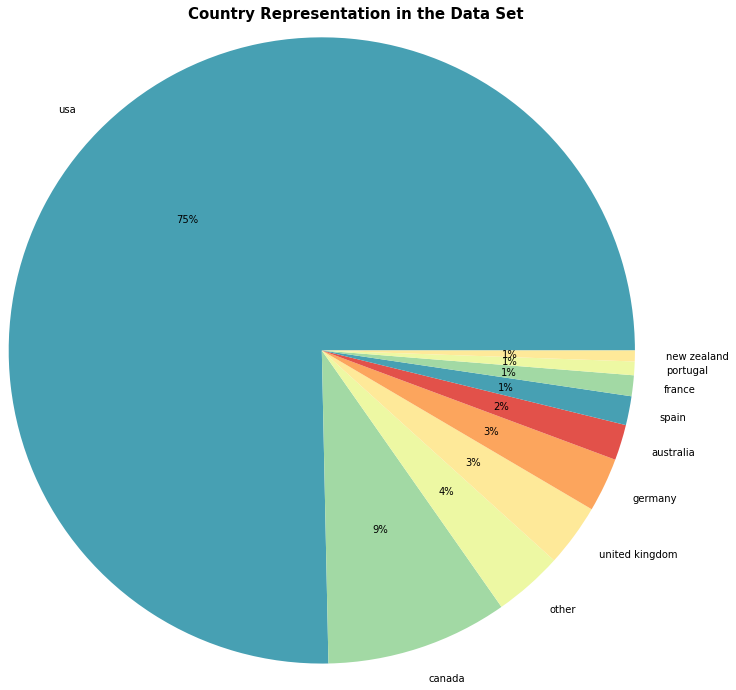

In [66]:
#define Seaborn color palette to use
colors = sns.color_palette('Spectral_r')[0:12]
#create pie chart
plt.figure(figsize=(15,8))
plt.title("Country Representation in the Data Set",fontsize=15, fontdict={"weight": "bold"},y=1.25,x=0.578)
f = plt.pie(countries.values[0:10], labels = countries.index[0:10], colors = colors, autopct='%.0f%%',radius=1.8)

### **Most customers are from United states of America, followed by Canada, United Kingdom and Germany.**

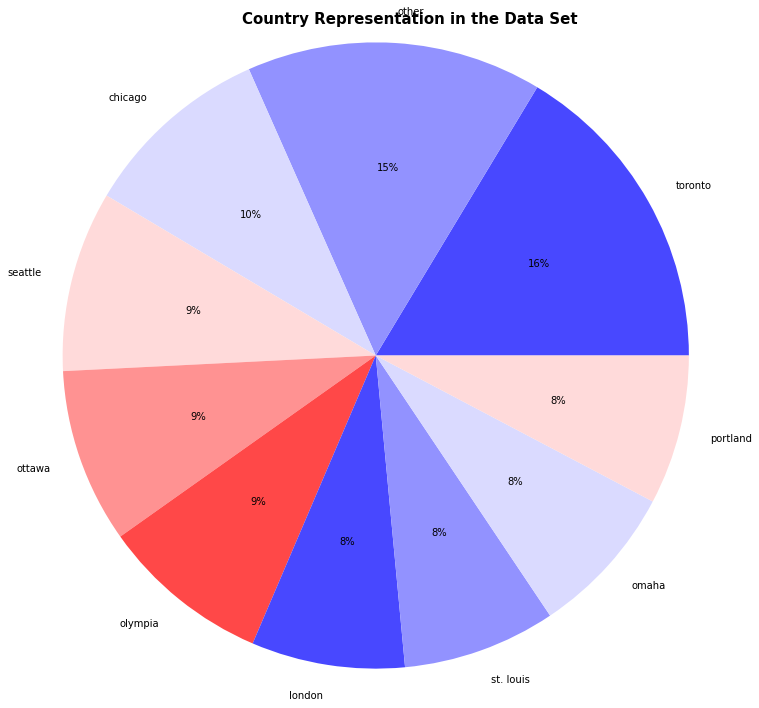

In [67]:
cities=book_df['City'].value_counts().sort_values(ascending=False)
#define Seaborn color palette to use
colors = sns.color_palette('bwr')[0:12]
#create pie chart
plt.figure(figsize=(15,8))
plt.title("Country Representation in the Data Set",fontsize=15, fontdict={"weight": "bold"},y=1.25,x=0.578)
f = plt.pie(cities.values[:10], labels = cities.index[:10], colors = colors, autopct='%.0f%%',radius=1.8)